<h1>Prediction of flight cancellation and summarazing flight records<h1>

<p> The Bureau of Transportation Statistics, which is part of the <a href="https://www.transtats.bts.gov/Tables.asp?DB_ID=120">US Department of Transportation</a>, has provided a data set that can be used to investigate air travel and investigate air travel delays. I'll also look at if flight cancellations can be predicted. To link airport identifiers to city names in the dataset 2017&#95;1.csv, the dataset L&#95;AIRPORT.csv is used.<p>
    
   
<p>data description:<p>
        <ul>
        <li> FL&#95;DATE: Flight Date (yyyy-mm-dd). </li>
        <li> CARRIER: Code assigned by IATA and commonly used to identify a carrier.</li>
        <li> TAIL&#95;NUM: Tail Number (identifier of the plane). </li>
        <li> ORIGIN: Origin Airport (airport of departure). </li>
        <li> DEST: Destination Airport (airport of arrival).</li>
        <li> DEP&#95;TIME: Actual Departure Time (hhmm). </li>
        <li> DEP&#95;DELAY: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.. </li>
        <li> ARR&#95;TIME: Actual Arrival Time (hhmm).</li>
        <li> ARR&#95;DELAY: Difference in minutes between scheduled and actual arrival time.
Early arrivals show negative numbers. </li>
        <li> CANCELLED: Canceled Flight Indicator (1=Yes)</li>
        <li> DIVERTED: Diverted Flight Indicator (1=Yes). </li>
        <li> CARRIER&#95;DELAY: Carrier Delay, in minutes.</li>
        <li> WEATHER&#95;DELAY: Weather Delay, in minutes. </li>
        <li> NAS&#95;DELAY: National Air System Delay, in minutes.</li>
        <li> SECURITY&#95;DELAY: Security Delay, in minutes.</li>
        <li> LATE&#95;AIRCRAFT&#95;DELAY: Late Aircraft Delay, in minutes.</li>
        </ul>

<h2>import packages<h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


#Own .py-scripts with classes and helper functions
%run flights.py


<h2>Data preparation<h2>
    

In [2]:
df_flights = pd.read_csv('data/2017_1.csv', sep=",", header=0)
df_airports = pd.read_csv('data/L_AIRPORT.csv-', sep=",", header=0)

In [3]:
df_flights.head()

,FL_DATE,CARRIER,TAIL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 16
0,2017-01-01,AA,N837AA,SAT,CLT,819.0,-9.0,1149.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,AA,N805AA,PHX,AUS,1025.0,43.0,1351.0,53.0,0.0,0.0,43.0,0.0,10.0,0.0,0.0,NaN
2,2017-01-01,AA,N198AA,LAX,PHL,1111.0,-9.0,1906.0,-23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,AA,N825AA,CLT,PHL,1124.0,10.0,1316.0,23.0,0.0,0.0,0.0,0.0,13.0,0.0,10.0,NaN
4,2017-01-01,AA,N711AA,PIT,CLT,834.0,-1.0,1022.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Rows and columns
df_flights.shape

(450017, 17)

In [5]:
# create a dictionary where key = old name and value = new name
dict = {"ORIGIN":"ORIGIN_AIRPORT",
        "DEST":"DESTINATION_AIRPORT"
       }
# call rename () method
df_flights.rename(columns=dict,
          inplace=True)


In [6]:
df_flights.head()

,FL_DATE,CARRIER,TAIL_NUM,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 16
0,2017-01-01,AA,N837AA,SAT,CLT,819.0,-9.0,1149.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,AA,N805AA,PHX,AUS,1025.0,43.0,1351.0,53.0,0.0,0.0,43.0,0.0,10.0,0.0,0.0,NaN
2,2017-01-01,AA,N198AA,LAX,PHL,1111.0,-9.0,1906.0,-23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,AA,N825AA,CLT,PHL,1124.0,10.0,1316.0,23.0,0.0,0.0,0.0,0.0,13.0,0.0,10.0,NaN
4,2017-01-01,AA,N711AA,PIT,CLT,834.0,-1.0,1022.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_airports.head()

,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"
3,05A,"Little Squaw, AK: Little Squaw Airport"
4,06A,"Kizhuyak, AK: Kizhuyak Bay"


In [8]:
description?

In [9]:
#extract city name from description and place it in a new column 'city origin airport'
df_airports["city origin airport"] = df_airports["Description"].apply(description)

In [10]:
#Copy the column of city origin airport because I will perform to merges
df_airports["city destination airport"] = df_airports["city origin airport"]

In [11]:
#drop description column
df_airports.drop(["Description"],axis=1,inplace=True)

In [12]:
df_airports.head()

,Code,city origin airport,city destination airport
0,01A,Afognak Lake,Afognak Lake
1,03A,Granite Mountain,Granite Mountain
2,04A,Lik,Lik
3,05A,Little Squaw,Little Squaw
4,06A,Kizhuyak,Kizhuyak


In [13]:
#Merge of df_flights and df_airports columns city origin airport and city destination airport
df_flights = df_flights.merge(df_airports,how='left', left_on = "ORIGIN_AIRPORT", right_on = "Code").merge(df_airports,how='left', left_on = "DESTINATION_AIRPORT", right_on = "Code")

In [14]:
#column names
df_flights.columns

Index(['FL_DATE', 'CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 16', 'Code_x',
       'city origin airport_x', 'city destination airport_x', 'Code_y',
       'city origin airport_y', 'city destination airport_y'],
      dtype='object')

In [15]:
#drop the following columns
df_flights.drop(["Code_x","city destination airport_x","Code_y","city origin airport_y","Unnamed: 16"],axis=1,inplace=True)

In [16]:
df_flights.head()

,FL_DATE,CARRIER,TAIL_NUM,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,city origin airport_x,city destination airport_y
0,2017-01-01,AA,N837AA,SAT,CLT,819.0,-9.0,1149.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,San Antonio,Charlotte
1,2017-01-01,AA,N805AA,PHX,AUS,1025.0,43.0,1351.0,53.0,0.0,0.0,43.0,0.0,10.0,0.0,0.0,Phoenix,Austin
2,2017-01-01,AA,N198AA,LAX,PHL,1111.0,-9.0,1906.0,-23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Los Angeles,Philadelphia
3,2017-01-01,AA,N825AA,CLT,PHL,1124.0,10.0,1316.0,23.0,0.0,0.0,0.0,0.0,13.0,0.0,10.0,Charlotte,Philadelphia
4,2017-01-01,AA,N711AA,PIT,CLT,834.0,-1.0,1022.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Charlotte


In [17]:
#Rename column names
df_flights.rename(columns = {'city origin airport_x':'city origin airport','city destination airport_y':'city destination airport'}, inplace = True)

In [18]:
df_flights.head()

,FL_DATE,CARRIER,TAIL_NUM,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,city origin airport,city destination airport
0,2017-01-01,AA,N837AA,SAT,CLT,819.0,-9.0,1149.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,San Antonio,Charlotte
1,2017-01-01,AA,N805AA,PHX,AUS,1025.0,43.0,1351.0,53.0,0.0,0.0,43.0,0.0,10.0,0.0,0.0,Phoenix,Austin
2,2017-01-01,AA,N198AA,LAX,PHL,1111.0,-9.0,1906.0,-23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Los Angeles,Philadelphia
3,2017-01-01,AA,N825AA,CLT,PHL,1124.0,10.0,1316.0,23.0,0.0,0.0,0.0,0.0,13.0,0.0,10.0,Charlotte,Philadelphia
4,2017-01-01,AA,N711AA,PIT,CLT,834.0,-1.0,1022.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Pittsburgh,Charlotte


In [19]:
#Export dataset tot csv file
df_flights.to_csv("data/flights.csv")

In [20]:
df_flights.describe()

,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,441476.000000,441476.000000,440746.000000,439645.000000,450017.000000,450017.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000
mean,1333.947392,12.134768,1487.332958,6.954484,0.019746,0.003302,20.308836,3.368857,15.742495,0.079745,24.947492
std,494.957196,47.274204,523.821795,49.595992,0.139126,0.057369,60.649157,27.809756,32.328181,2.896287,47.850860
min,1.000000,-59.000000,1.000000,-98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,921.000000,-5.000000,1108.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1330.000000,-2.000000,1521.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000
75%,1738.000000,10.000000,1921.000000,11.000000,0.000000,0.000000,17.000000,0.000000,20.000000,0.000000,31.000000
max,2400.000000,2755.000000,2400.000000,1944.000000,1.000000,1.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000


In [21]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450017 entries, 0 to 450016
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   FL_DATE                   450017 non-null  object 
 1   CARRIER                   450017 non-null  object 
 2   TAIL_NUM                  449378 non-null  object 
 3   ORIGIN_AIRPORT            450017 non-null  object 
 4   DESTINATION_AIRPORT       450017 non-null  object 
 5   DEP_TIME                  441476 non-null  float64
 6   DEP_DELAY                 441476 non-null  float64
 7   ARR_TIME                  440746 non-null  float64
 8   ARR_DELAY                 439645 non-null  float64
 9   CANCELLED                 450017 non-null  float64
 10  DIVERTED                  450017 non-null  float64
 11  CARRIER_DELAY             97699 non-null   float64
 12  WEATHER_DELAY             97699 non-null   float64
 13  NAS_DELAY                 97699 non-null   f

In [22]:
# CANCELLED. Canceled Flight Indicator (1=Yes, 0=No).
# DIVERTED. Diverted Flight Indicator (1=Yes, 0=No)
#transform INT64 columns to boolean
df_flights[["CANCELLED","DIVERTED"]] = df_flights[["CANCELLED","DIVERTED"]].astype('bool')


In [23]:
df_flights[["CANCELLED","DIVERTED"]] 

,CANCELLED,DIVERTED
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
450012,False,False
450013,False,False
450014,False,False
450015,False,False


In [24]:
#Total number of cancelled flights
len(df_flights[df_flights["CANCELLED"] == True])

8886

In [25]:
#total number of diverted flights
len(df_flights[df_flights["DIVERTED"] == True])

1486

In [26]:
#  flight records in the dataset are analyzed for which we want to extract relevant information except
        # flight records for cancelled or diverted flights (these don’t have departure and/or
        # arrival times)

df_flights_cancelled_diverted_removed = df_flights[(df_flights["CANCELLED"] == False) & (df_flights["DIVERTED"] == False)]       

In [27]:
#Export dataset to csv file
df_flights_cancelled_diverted_removed.to_csv("data/flights_cancelled_diverted_removed.csv")

<p> I designed two classes to gather dataset information based on a groupfield on which the data is grouped, datafield is the field of the data to collect, and filter is a filter that can be used to filter on the relevant section of the flight dataset. The class that has filter as argument is the subclass of the other one,both require a dataset, groupfield and datafield as arguments.The group field is one of the following two options: <b>(departure)<b> group on the departure time and <b>(arrival)<b> group on the arrival time. The data field is one of the following options: <b>(flights)<b> number of flights, each flight counts as one, <b>(departure delays)<b> the departure delay in minutes, <b>(arrival delays)<b> the arrival delay in minutes and ad&#95;*. (with * = carrier, weather, nas, security, or late&#95;aircraft) that gives the arrival delay of the specified category.<p>

<p>The following options are available for filtering. We can start by limiting our options with the city of the airport(s) of arrival and departure: <b>(d&#95;city)<b> specify the exact city to departure in, all departure airports in other cities are ignored (by exact matching name, if several cities have exactly the same name, then include all of them in the result) and (a&#95;city) specify the exact city to arrive in, all arrival airports in other cities are ignored (by exact matching name, if several cities have exactly the same name, then include all of them in the result). You can also choose to filter for specific airlines or planes: (airline) by carrier code, you can specify the actual airline and (plane) all other flights will be not ignored unless you specify the exact tail number of the plane whose flights you want to include. Each filter can only be present once.
 <p>

<h2> A few examples <h2>

In [28]:
#column names
df_flights.columns

Index(['FL_DATE', 'CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'city origin airport',
       'city destination airport'],
      dtype='object')

In [29]:
#unique cities in origin airport
df_flights_cancelled_diverted_removed["city origin airport"].unique()

array(['San Antonio', 'Phoenix', 'Los Angeles', 'Charlotte', 'Pittsburgh',
       'West Palm Beach/Palm Beach', 'Atlanta', 'Baltimore', 'Las Vegas',
       'Philadelphia', 'Fort Lauderdale', 'Minneapolis', 'New York',
       'Detroit', 'Dallas/Fort Worth', 'San Francisco', 'Raleigh/Durham',
       'Miami', 'San Diego', 'Seattle', 'Fort Myers', 'Denver', 'Buffalo',
       'St. Louis', 'Washington', 'Ontario', 'Chicago', 'Boston',
       'Houston', 'Nashville', 'Newark', 'Palm Springs', 'Oklahoma City',
       'Eagle', 'Orlando', 'Mission/McAllen/Edinburg', 'Columbus',
       'Memphis', 'New Orleans', 'Cleveland', 'Tucson', 'Kansas City',
       'Albuquerque', 'San Juan', 'Charlotte Amalie', 'Salt Lake City',
       'Jackson', 'Long Beach', 'Worcester', 'White Plains', 'Tampa',
       'Jacksonville', 'Hartford', 'Austin', 'Anchorage', 'Birmingham',
       'Santa Ana', 'Greensboro/High Point', 'Kahului', 'Wichita',
       'Panama City', 'Portland', 'Honolulu', 'Cedar Rapids/Iowa City',
  

In [30]:
#unique cities in destination airport
df_flights_cancelled_diverted_removed["city destination airport"].unique()

array(['Charlotte', 'Austin', 'Philadelphia',
       'West Palm Beach/Palm Beach', 'Houston', 'Miami', 'Boston',
       'Seattle', 'Pittsburgh', 'New York', 'Atlanta', 'Orlando',
       'Dallas/Fort Worth', 'Raleigh/Durham', 'St. Louis', 'Hartford',
       'Las Vegas', 'Los Angeles', 'Fort Lauderdale', 'San Francisco',
       'Washington', 'Phoenix', 'San Diego', 'Gunnison', 'Baltimore',
       'Newark', 'Tucson', 'Chicago', 'Nashville', 'Palm Springs', 'Reno',
       'Oklahoma City', 'Denver', 'Jackson', 'Detroit', 'Portland',
       'Mission/McAllen/Edinburg', 'Christiansted', 'Norfolk',
       'Santa Ana', 'Lubbock', 'Columbus', 'Memphis', 'New Orleans',
       'Tampa', 'Fort Myers', 'Charlotte Amalie', 'San Antonio', 'Eagle',
       'Omaha', 'Albuquerque', 'San Juan', 'Jacksonville', 'Minneapolis',
       'Tulsa', 'Ontario', 'White Plains', 'Buffalo', 'Worcester',
       'Long Beach', 'Salt Lake City', 'Cincinnati', 'Kahului', 'Kona',
       'Columbia', 'Wichita', 'Billings', 'Pana

In [31]:
#unique planes
df_flights_cancelled_diverted_removed["TAIL_NUM"].unique()

array(['N837AA', 'N805AA', 'N198AA', ..., 'N186DN', 'N787UA', 'N14991'],
      dtype=object)

In [32]:
#unique airlines
df_flights_cancelled_diverted_removed["CARRIER"].unique()

array(['AA', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'WN', 'AS', 'UA',
       'VX'], dtype=object)

<p>I didn't implement exception handling when we supply incorrect parameter values<p>

In [33]:
ex1 = GroupField_datafield(df_flights_cancelled_diverted_removed,"arrival","flights")

In [34]:
ex1.make_dictionary?


In [35]:
ex1.data_analysis?

In [36]:
ex1.make_dictionary()

In [37]:
ex1.output_data?

In [38]:
ex1.output_data()

 0:00- 1:59: |***                 |   9686
 2:00- 3:59: |                    |   1332
 4:00- 5:59: |*                   |   4420
 6:00- 7:59: |*******             |  20415
 8:00- 9:59: |***************     |  44591
10:00-11:59: |******************  |  51780
12:00-13:59: |******************  |  51892
14:00-15:59: |******************  |  52092
16:00-17:59: |********************|  56178
18:00-19:59: |******************* |  54020
20:00-21:59: |******************  |  53027
22:00-23:59: |**************      |  40212
------------------------------------------
                                    439645


In [39]:
ex1.barplot_data?

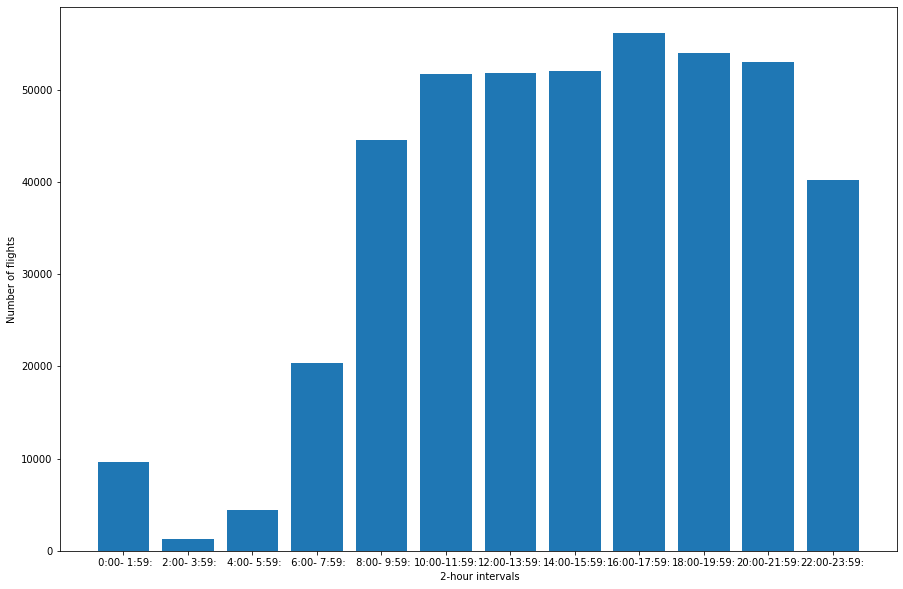

In [40]:
#y-axis shows the total number of flight
ex1.barplot_data()

In [41]:
ex2 = GroupField_datafield(df_flights_cancelled_diverted_removed,"departure","flights")
ex2.make_dictionary()
ex2.output_data()


 0:00- 1:59: |*                   |   2838
 2:00- 3:59: |                    |    558
 4:00- 5:59: |*****               |  15681
 6:00- 7:59: |******************* |  53518
 8:00- 9:59: |******************* |  54282
10:00-11:59: |******************* |  53539
12:00-13:59: |******************* |  52917
14:00-15:59: |******************* |  53248
16:00-17:59: |********************|  54443
18:00-19:59: |******************  |  49193
20:00-21:59: |************        |  34651
22:00-23:59: |*****               |  14777
------------------------------------------
                                    439645


In [42]:
ex3 = GroupField_datafield(df_flights_cancelled_diverted_removed,"arrival","arrival_delays")
ex3.make_dictionary()
ex3.output_data()

 0:00- 1:59: |************        |  621245
 2:00- 3:59: |****                |  203413
 4:00- 5:59: |*                   |   56133
 6:00- 7:59: |**                  |  102529
 8:00- 9:59: |*****               |  290213
10:00-11:59: |**********          |  518376
12:00-13:59: |*************       |  632691
14:00-15:59: |**************      |  721842
16:00-17:59: |****************    |  801433
18:00-19:59: |******************  |  917942
20:00-21:59: |********************|  968474
22:00-23:59: |******************* |  945388
-------------------------------------------
                                    6779679


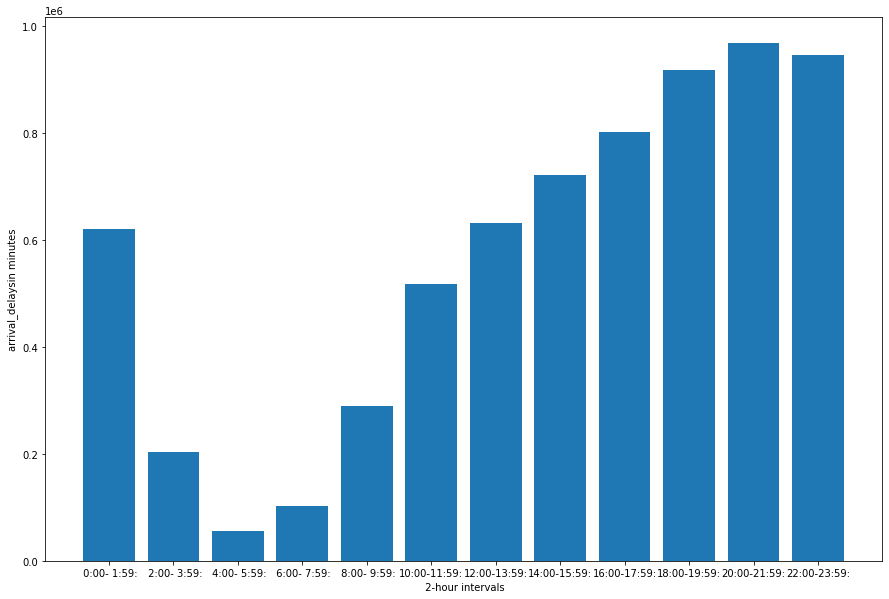

In [43]:
#Y-axis shows the delay in minutes 
ex3.barplot_data()

In [44]:
ex4 = GroupField_datafield_filter(df_flights_cancelled_diverted_removed, "arrival", "arrival_delays",
                                "d_city=New York;a_city=Los Angeles;airline=DL")
ex4.make_dictionary()
ex4.output_data()

 0:00- 1:59: |*************       |  643
 2:00- 3:59: |******              |  294
 4:00- 5:59: |********            |  397
 6:00- 7:59: |                    |    0
 8:00- 9:59: |                    |    0
10:00-11:59: |*****               |  259
12:00-13:59: |******************  |  902
14:00-15:59: |*********           |  479
16:00-17:59: |********************|  972
18:00-19:59: |*************       |  676
20:00-21:59: |***********         |  556
22:00-23:59: |*******             |  360
----------------------------------------
                                    5538


In [45]:
ex5 = GroupField_datafield_filter(df_flights_cancelled_diverted_removed, " departure", "arrival_delays",
                                "plane=N624AG")
ex5.make_dictionary()
ex5.output_data()


 0:00- 1:59: |********************| 294
 2:00- 3:59: |                    |   0
 4:00- 5:59: |                    |   0
 6:00- 7:59: |                    |   0
 8:00- 9:59: |*********           | 144
10:00-11:59: |                    |  10
12:00-13:59: |***                 |  49
14:00-15:59: |*****               |  87
16:00-17:59: |*********           | 141
18:00-19:59: |******              |  94
20:00-21:59: |                    |   0
22:00-23:59: |*******             | 107
---------------------------------------
                                    926


In [46]:
ex6 = GroupField_datafield_filter(df_flights_cancelled_diverted_removed, "arrival", "flights",
                                 "airline=DL;plane=N624AG")
ex6.make_dictionary()
ex6.output_data()

 0:00- 1:59: |*****               |  4
 2:00- 3:59: |*                   |  1
 4:00- 5:59: |*                   |  1
 6:00- 7:59: |*****               |  4
 8:00- 9:59: |****                |  3
10:00-11:59: |***************     | 11
12:00-13:59: |****                |  3
14:00-15:59: |************        |  9
16:00-17:59: |***********         |  8
18:00-19:59: |*******             |  5
20:00-21:59: |********************| 14
22:00-23:59: |*****               |  4
--------------------------------------
                                    67


In [47]:
ex7 = GroupField_datafield_filter(df_flights_cancelled_diverted_removed, "departure", "ad_carrier",
                                 "plane=N624AG")
ex7.make_dictionary()
ex7.output_data()

 0:00- 1:59: |                    |   0
 2:00- 3:59: |                    |   0
 4:00- 5:59: |                    |   0
 6:00- 7:59: |                    |   0
 8:00- 9:59: |**********          |  45
10:00-11:59: |                    |   0
12:00-13:59: |****                |  19
14:00-15:59: |                    |   1
16:00-17:59: |*                   |   7
18:00-19:59: |**********          |  47
20:00-21:59: |                    |   0
22:00-23:59: |********************|  90
---------------------------------------
                                    209


<h2>Flight Cancellation Prediction<h2>
    

In [48]:
# full dataset
df_flights.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 450017 entries, 0 to 450016
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   FL_DATE                   450017 non-null  object 
 1   CARRIER                   450017 non-null  object 
 2   TAIL_NUM                  449378 non-null  object 
 3   ORIGIN_AIRPORT            450017 non-null  object 
 4   DESTINATION_AIRPORT       450017 non-null  object 
 5   DEP_TIME                  441476 non-null  float64
 6   DEP_DELAY                 441476 non-null  float64
 7   ARR_TIME                  440746 non-null  float64
 8   ARR_DELAY                 439645 non-null  float64
 9   CANCELLED                 450017 non-null  bool   
 10  DIVERTED                  450017 non-null  bool   
 11  CARRIER_DELAY             97699 non-null   float64
 12  WEATHER_DELAY             97699 non-null   float64
 13  NAS_DELAY                 97699 non-null   f

<h2>Data preprocessing<h2>


In [49]:
df_flights.isna().mean()
#percentage of missing values in each column
#delete the following columns that have 78% missing values

FL_DATE                     0.000000
CARRIER                     0.000000
TAIL_NUM                    0.001420
ORIGIN_AIRPORT              0.000000
DESTINATION_AIRPORT         0.000000
DEP_TIME                    0.018979
DEP_DELAY                   0.018979
ARR_TIME                    0.020601
ARR_DELAY                   0.023048
CANCELLED                   0.000000
DIVERTED                    0.000000
CARRIER_DELAY               0.782899
WEATHER_DELAY               0.782899
NAS_DELAY                   0.782899
SECURITY_DELAY              0.782899
LATE_AIRCRAFT_DELAY         0.782899
city origin airport         0.000000
city destination airport    0.000000
dtype: float64

In [50]:
{column:len(df_flights[column].unique()) for column in df_flights.columns}

{'FL_DATE': 31,
 'CARRIER': 12,
 'TAIL_NUM': 4391,
 'ORIGIN_AIRPORT': 298,
 'DESTINATION_AIRPORT': 297,
 'DEP_TIME': 1428,
 'DEP_DELAY': 897,
 'ARR_TIME': 1441,
 'ARR_DELAY': 894,
 'CANCELLED': 2,
 'DIVERTED': 2,
 'CARRIER_DELAY': 684,
 'WEATHER_DELAY': 393,
 'NAS_DELAY': 384,
 'SECURITY_DELAY': 72,
 'LATE_AIRCRAFT_DELAY': 472,
 'city origin airport': 287,
 'city destination airport': 286}

<p> Remove tailnumber over 4000 unique values not suitable for one hot encoding and city names because its for the most already been represented by airports<p> 

In [51]:
df_flights.describe()

,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,441476.000000,441476.000000,440746.000000,439645.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000
mean,1333.947392,12.134768,1487.332958,6.954484,20.308836,3.368857,15.742495,0.079745,24.947492
std,494.957196,47.274204,523.821795,49.595992,60.649157,27.809756,32.328181,2.896287,47.850860
min,1.000000,-59.000000,1.000000,-98.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,921.000000,-5.000000,1108.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1330.000000,-2.000000,1521.000000,-5.000000,0.000000,0.000000,4.000000,0.000000,3.000000
75%,1738.000000,10.000000,1921.000000,11.000000,17.000000,0.000000,20.000000,0.000000,31.000000
max,2400.000000,2755.000000,2400.000000,1944.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000


<p>Fill remaining missing values with column median resistant against outliers <p>

In [52]:
preprocessing_dataset?

In [53]:
df = preprocessing_dataset(df_flights)

In [54]:
df.sample(10)

,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DATE_2017-01-01,DATE_2017-01-02,DATE_2017-01-03,DATE_2017-01-04,...,OA_TWF,OA_TXK,OA_TYR,OA_TYS,OA_VLD,OA_VPS,OA_WRG,OA_XNA,OA_YAK,OA_YUM
385637,1129.0,-1.0,1255.0,0.0,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196425,729.0,-1.0,1020.0,-5.0,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422781,910.0,15.0,1135.0,45.0,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21651,956.0,1.0,1140.0,-17.0,False,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
170288,2109.0,29.0,2236.0,6.0,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363528,1343.0,-7.0,1458.0,-11.0,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311380,742.0,-3.0,929.0,-11.0,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57522,1524.0,-6.0,1605.0,-5.0,False,False,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
302587,750.0,-10.0,1113.0,-10.0,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26243,1712.0,-1.0,1759.0,5.0,False,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#it gives the total number of missing valus in the dataset
df.isna().sum().sum()

0

<h2>Split between Test and Train (20/80)<h2>
    

In [56]:
 # Split df into X((features) and y(target)
y = df['CANCELLED']
X = df.drop('CANCELLED', axis=1)

In [57]:
X

,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DIVERTED,DATE_2017-01-01,DATE_2017-01-02,DATE_2017-01-03,DATE_2017-01-04,DATE_2017-01-05,...,OA_TWF,OA_TXK,OA_TYR,OA_TYS,OA_VLD,OA_VPS,OA_WRG,OA_XNA,OA_YAK,OA_YUM
0,819.0,-9.0,1149.0,-22.0,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1025.0,43.0,1351.0,53.0,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1111.0,-9.0,1906.0,-23.0,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1124.0,10.0,1316.0,23.0,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,834.0,-1.0,1022.0,3.0,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450012,1807.0,-8.0,2023.0,-24.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450013,2339.0,-16.0,603.0,-17.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450014,1505.0,0.0,1901.0,15.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450015,1746.0,-4.0,1856.0,2.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p> Make sure to use stratification to have all classes represented in the same fashion across the different classes <p>

In [58]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True,stratify=y)

<p>Verify the split in the test and training set across the different classes<p>

In [59]:
#array that gives the cancelled and not-cancelled number of flight records
np.unique(y_test, return_counts=True)

(array([False,  True]), array([88227,  1777], dtype=int64))

In [60]:
np.unique(y_train, return_counts=True)

(array([False,  True]), array([352904,   7109], dtype=int64))

In [61]:
#ratio cancelled vs not-cancelled
np.unique(y_test, return_counts=True)[1][1]/np.unique(y_test, return_counts=True)[1][0]

0.020141226608634544

In [62]:
np.unique(y_train, return_counts=True)[1][1]/np.unique(y_train, return_counts=True)[1][0]

0.02014428853172534

<p>They roughly have the same ratio of cancelled flight<p>

<h2>Model building and model validation<h2>

In [63]:
logistic_Reg = LogisticRegression(C=0.001, class_weight='None', penalty='l2',max_iter=1000,random_state=122)
classification_knn = KNeighborsClassifier(n_neighbors=15)
classification_randomforest = RandomForestClassifier(random_state=123)

<p>To predict flight cancellations, I used three supervised machine learning techniques. <p>

In [64]:
models_dictionary = {"LogisticRegression":logistic_Reg,
                     "KNeighborsClassifier":classification_knn,
                     "RandomForestClassifier":classification_randomforest
                     }

In [65]:
models = list(models_dictionary.keys())
        # get keys as list from dict models_dictionary

<p> The idea is to find out which flights are most likely to be cancelled. This is referred to as a binary classification where  we're categorizing flights as cancelled or not-cancelled. The probality of belonging to one of the two categories is calculated using logistic regression. To assign our probability estimation in one of the two groups, we use a cutoff of 0.5. If the probability estimate from the logistic regression is equal to or greater than 0.5, it is considered cancelled; otherwise, it is considered not-cancelled.The last two approaches are real classifiers, which will be compared to the logistic regression model to see which model performs better on the dataset.<p>

<p>I looked at a confusion matrix of the test data as part of the evalution to determine if the model is good at categorizing one class but not so good at detecting elements of the other. The majority of the elements should lie in the diagonal that encompass only true positives and negatives. The classification report also provides valuable information regarding precision, recall and f1-score. Hyperparameter tuning was not performed using GridSearchCV because of the high accuracy score for each model and it was computationally expensive. KNN has a long runtime because it is already computationally expensive and runs a large dataset, but its better to incorporate more models to improve our accurate predictions.<p>

 Results from: LogisticRegression

 Accuracy score for training set is: 0.9801896042642905

 Accuracy score for test set is: 0.9801897693435847


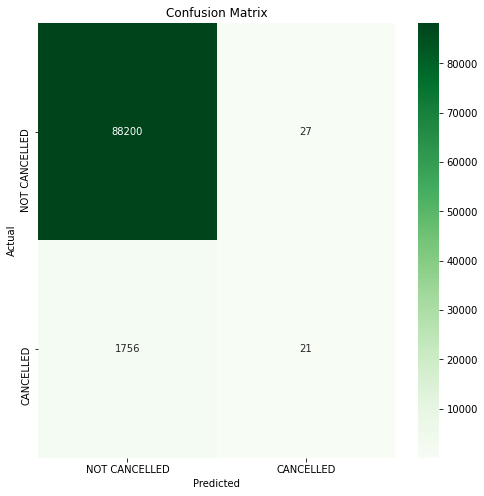

               precision    recall  f1-score   support

NOT CANCELLED       0.98      1.00      0.99     88227
    CANCELLED       0.44      0.01      0.02      1777

     accuracy                           0.98     90004
    macro avg       0.71      0.51      0.51     90004
 weighted avg       0.97      0.98      0.97     90004

 Results from: KNeighborsClassifier

 Accuracy score for training set is: 0.9812034565418472

 Accuracy score for test set is: 0.9807675214434914


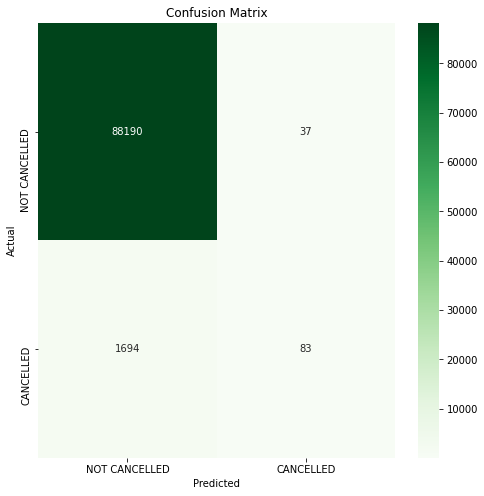

               precision    recall  f1-score   support

NOT CANCELLED       0.98      1.00      0.99     88227
    CANCELLED       0.69      0.05      0.09      1777

     accuracy                           0.98     90004
    macro avg       0.84      0.52      0.54     90004
 weighted avg       0.98      0.98      0.97     90004

 Results from: RandomForestClassifier

 Accuracy score for training set is: 1.0

 Accuracy score for test set is: 0.9999111150615528


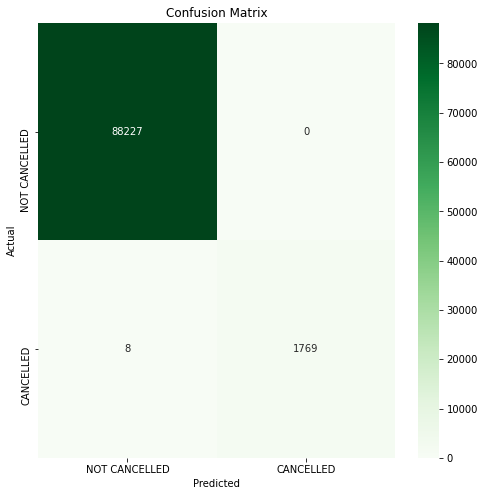

               precision    recall  f1-score   support

NOT CANCELLED       1.00      1.00      1.00     88227
    CANCELLED       1.00      1.00      1.00      1777

     accuracy                           1.00     90004
    macro avg       1.00      1.00      1.00     90004
 weighted avg       1.00      1.00      1.00     90004



In [66]:
for model in models:
    
    pipe = Pipeline(steps=[
                ('scaler', StandardScaler()),
                 ('model', models_dictionary[model] )
                 ])
    pipe.fit(X_train,y_train)
    score_train = pipe.score(X_train,y_train)
    score_test = pipe.score(X_test,y_test)
    y_true = np.array(y_test)
    y_prediction = pipe.predict(X_test)
    cm = confusion_matrix(y_true, y_prediction)
    clr = classification_report(y_true, y_prediction, target_names=["NOT CANCELLED", "CANCELLED"])
        
    print(" Results from:",model)
    print("\n Accuracy score for training set is:",score_train)
    print("\n Accuracy score for test set is:",score_test)
        
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')
    plt.xticks(np.arange(2) + 0.5, ["NOT CANCELLED", "CANCELLED"])
    plt.yticks(np.arange(2) + 0.5, ["NOT CANCELLED", "CANCELLED"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
        
    print(clr)
        
        

<p>There's no indication of overfitting due to the models performance on the training dataset are similar on data not observed during training. The randomforest classifier has approximately a 100% accuracy score for the test data, with only 8 wrong predictions. The remaining two models have a high accuracy score as well, but this is mainly due to the fact that 98% of the data consist of non-cancelled flights, and labeling them as such increases their chances of being true. KNeighborsClassifier and LogisticRegression have recalls of 0.5 and 0.1, respectively. In terms of precision, recall, f1-score, and accuracy score, we can infer that the Random forest model provides the greatest fit for predicting flight cancellation.<p>

class Model_select:
    def __init__(self,X_train,y_train,X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
    def model_selection(self):
        """
        hyperparameter tuning is performed using GridSearchCV
        technique uses cross-validation when applying the default values of a 5-fold cross validation 
        as a means of splitting the training data into a training and validation sets.
        model score is representen with the accuracy metrics
        """
        models = []
        models_1 = ["LogisticRegression"]
        models_2 = ["KNeighborsClassifier"]
        model_3 = ["RandomForestClassifier"]
        models += models_1 + models_2 + model_3
        models_dictionary = {"LogisticRegression":LogisticRegression(max_iter=1000,random_state=122),
                     "KNeighborsClassifier":KNeighborsClassifier(),
                     "RandomForestClassifier":RandomForestClassifier(random_state=123)
                     }
                            
        models_accuracyscore = {}
        
        
        # Tuning of parameters for classification by cross-validation
                    # Number of cross valiations is 5
        
        for model in models:
            pipe = Pipeline(steps=[
                ('scaler', StandardScaler()),
                 ('model', models_dictionary[model] )
                 ])
            pipe.fit(X_train,y_train)
            
            
            if model in models_1:
                parameters = {'scaler' : [StandardScaler(), RobustScaler()],
                              "C":[0.0001,0.001,0.01,0.1,1],
                              'solver':[ 'lbfgs','sag', 'saga'],
                              "class_weight":['None', 'balanced']
                             }
                              
            elif model in models_2:
                 parameters = {'scaler' : [StandardScaler(), RobustScaler()],
                              "n_neighbors":[5,10,15,20,30],
                               "weights":["uniform","distance"],
                               'metric':["euclidean","manhattan","minkowski"]
                             }
            else:
                parameters ={'n_estimators' : [20,30,40,60,80,100],
                             'max_depth'    : [4,6,8,10]}
            gridsearch = GridSearchCV(pipe,parameters, verbose=1, scoring = 'accuracy',n_jobs = -1).fit(self.X_train, self.y_train)
            print(" Results from Grid Search:",model)
            print("\n The best estimator across ALL searched params:\n",gridsearch.best_estimator_)
            print("\n The best score across ALL searched params:\n",gridsearch.best_score_)
            print("\n The best parameters across ALL searched params:\n",gridsearch.best_params_)
            print('\n Final score is: ', gridsearch.score(self.X_test, self.y_test))
            print("")
            models_accuracyscore[model] = gridsearch.score(self.X_test, self.y_test)
        self.models_accuracyscore = models_accuracyscore
            
        

model = Model_select(X_train, y_train,X_test, y_test)

model.model_selection()

model.models_accuracyscore